In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

In [4]:
with open("../pickle/df_cleaned.pickle", "rb") as fp:
    res = pickle.load(fp)
print(res.shape)
print(res[res['TRANSACTION CODE']==1].shape)
print(len(np.unique(res.Key)))
print(len(np.unique(res[res['TRANSACTION CODE']==1].Key)))
print(len(np.unique(res[res['TRANSACTION CODE']==605].Key)))

(1931162, 11)
(1784018, 11)
25964
23833
11701


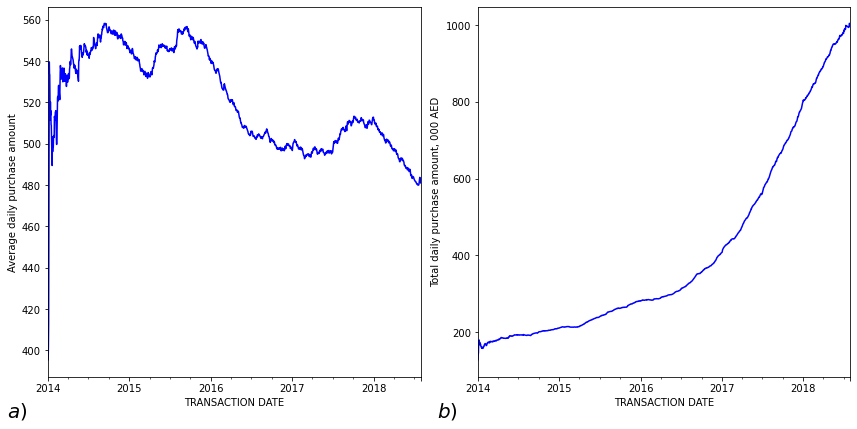

In [5]:
kkk=res[res['TRANSACTION CODE']==1.0].groupby('TRANSACTION DATE').agg({"TRANS AMT IN AED-Signed": [np.mean,np.sum]});
kkk[('TRANS AMT IN AED-Signed','sum')]/=1000
mask=kkk.index.values>=np.datetime64('2014-01-01');
kkk=kkk[mask];
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax1=kkk.drop([('TRANS AMT IN AED-Signed','sum')],axis=1).ewm(span = 500).mean().plot(ax = axes[0],style = 'b',legend=False);
ax1.set_ylabel("Average daily purchase amount");
ax2=kkk.drop([('TRANS AMT IN AED-Signed','mean')],axis=1).ewm(span = 500).mean().plot(ax = axes[1],style = 'b',legend=False);
ax2.set_ylabel("Total daily purchase amount, 000 AED");
axes[0].text(-0.11,-0.11, '$\it{a)}$', transform=axes[0].transAxes,size=20)
axes[1].text(-0.11,-0.11, '$\it{b)}$', transform=axes[1].transAxes,size=20)
plt.tight_layout()

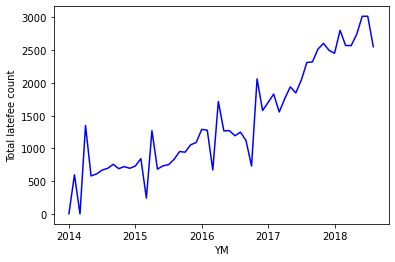

In [4]:
res['YM']=res['YEAR']+res['MONTH']/12
kkk=res[res['TRANSACTION CODE']==605.0].groupby('YM').agg({"TRANS AMT IN AED-Signed": [len]});
ax=kkk.plot(style = 'b',legend=False);
ax.set_ylabel("Total latefee count");

                 TRANS AMT IN AED-Signed
                                     len
TRANSACTION DATE                        
2014-01-30                         598.0
2014-02-04                           1.0
2014-03-02                         638.0
2014-03-07                           6.0
2014-03-30                         706.0
...                                  ...
2018-07-27                          90.0
2018-07-28                          64.0
2018-07-29                          63.0
2018-07-30                          56.0
2018-07-31                          23.0

[198 rows x 1 columns]


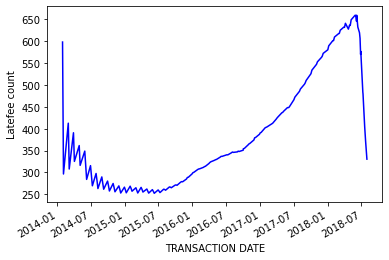

In [5]:
kkk=res[res['TRANSACTION CODE']==605].groupby('TRANSACTION DATE').agg({"TRANS AMT IN AED-Signed": [len]});
mask=kkk.index.values>=np.datetime64('2014-01-01');
kkk=kkk[mask];
print(kkk)
ax=kkk.ewm(span = 100).mean().plot(style = 'b',legend=False);
ax.set_ylabel("Latefee count");

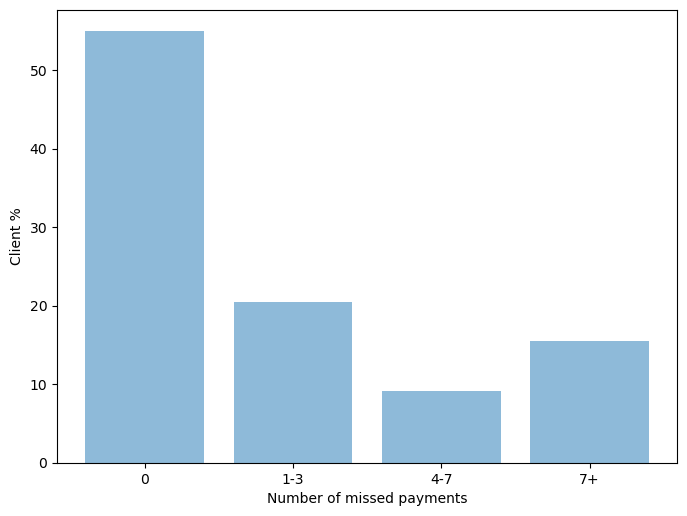

In [6]:
general_count = res['Key'].nunique()
with_ = res[res['TRANSACTION CODE']==605]
a = with_.groupby('Key').size()
a = a.sort_values()
count = [0, len(a[a.between(0,4, inclusive=False)]), len(a[a.between(3,8, inclusive=False)]), len(a[a>7])]
count[0]=general_count-len(a)
count = [100* i / general_count for i in count]
x = ('0', '1-3', '4-7', '7+')
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.bar(np.arange(4), count, align='center', alpha=0.5)
plt.xticks(np.arange(4), x)
plt.ylabel('Client %')
plt.xlabel('Number of missed payments')
plt.show()

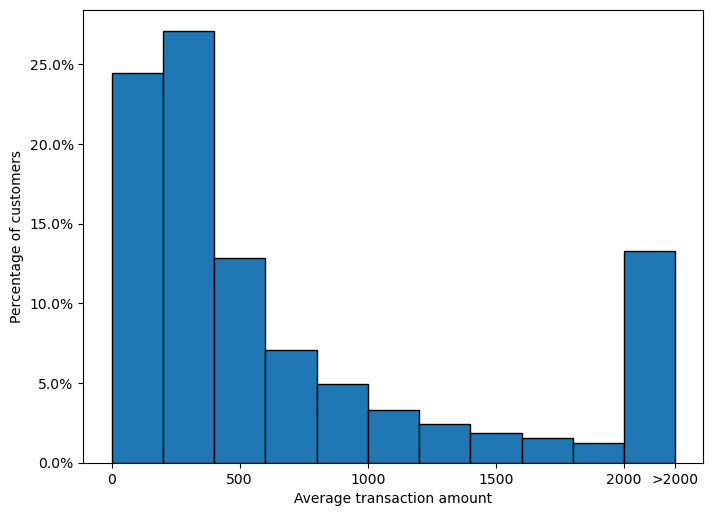

In [7]:
k = 200
res = res[res['TRANSACTION CODE']==1]
a = res.groupby('Key').agg({'TRANS AMT IN AED-Signed':'mean'})
a[a>10*k]=11*k
data=a['TRANS AMT IN AED-Signed']

plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.hist(data,weights=np.ones(len(data)) / len(data), bins=np.arange(12)*k,edgecolor='black')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
locs, labels = plt.xticks()
locs=locs.tolist()
locs.pop(0)
clocs=[int(i)for i in locs]
clocs[-1]=">{}".format(10*k)
locs[-1]=11*k
plt.xticks(locs,clocs)
plt.xlabel("Average transaction amount")
plt.ylabel("Percentage of customers")
plt.show()

Text(0, 0.5, 'Percentage of customers')

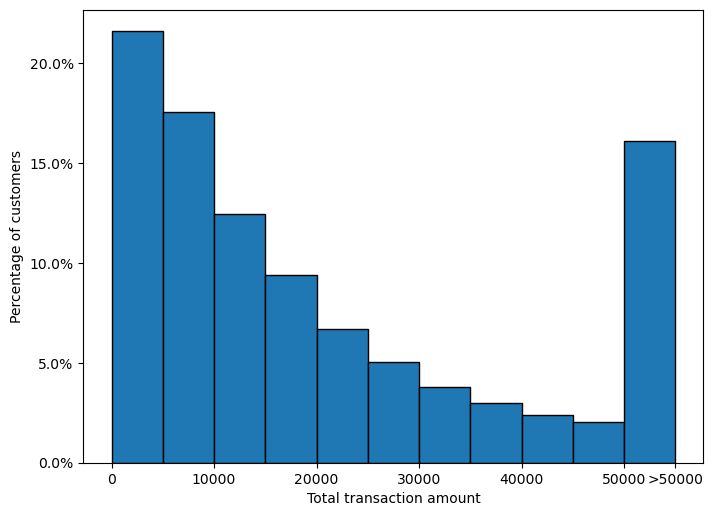

In [8]:
a = res.groupby('Key').agg({'TRANS AMT IN AED-Signed':'sum'})
k = 5000
a[a>10*k]=11*k
data=a['TRANS AMT IN AED-Signed']
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.hist(data,weights=np.ones(len(data)) / len(data), bins=np.arange(12)*k,edgecolor='black')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
locs, labels = plt.xticks()
locs=locs.tolist()
locs.pop(0)
clocs=[int(i)for i in locs]
clocs[-1]=">{}".format(10*k)
locs[-1]=11*k
plt.xticks(locs,clocs)
plt.xlabel("Total transaction amount")
plt.ylabel("Percentage of customers")